In [90]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot
import pandas

In [91]:
dataset = datasets.load_diabetes(as_frame=True)
X = dataset.data[["bmi"]]
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [92]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
Y_predSKL = regression.predict(X_test)


In [93]:
from LinearFunction import LinearFunction
linearApproximation = LinearFunction.FindApproximatedLinearFunction(X_train.values, Y_train.values)
Y_predManual = [linearApproximation(x)[0] for x in X_test.values]

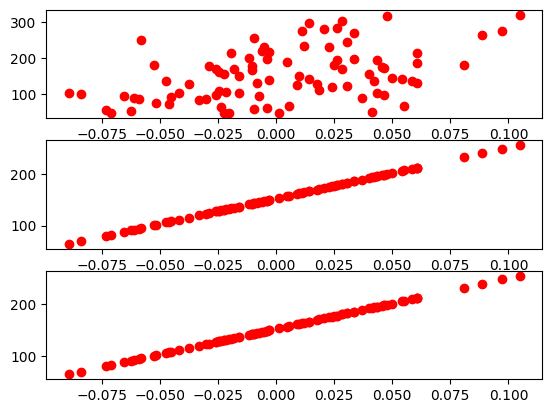

In [94]:
fig, (axis1, axis2, axis3) =  pyplot.subplots(3)
axis1.plot(X_test, Y_test, "o", color="r")
axis2.plot(X_test, Y_predSKL, "o", color="r")
axis3.plot(X_test, Y_predManual, "o", color="r")

In [95]:
print(f"SKLearn:\n\t y = {regression.coef_[0]}x + {regression.intercept_}")
print(f"Manual:\n\t y = {linearApproximation.k[0]}x + {linearApproximation.b[0]}")

predictedData = pandas.DataFrame({'Actual': Y_test, 'Predicted (SKL)': Y_predSKL, 'Predicted (Manual)' : Y_predManual}) 
predictedData

SKLearn:
	 y = 981.6554361411928x + 152.28824927379569
Manual:
	 y = 981.6554361411934x + 152.28824927379569


,Actual,Predicted (SKL),Predicted (Manual)
362,321.0,255.174269,255.174269
249,215.0,211.794626,211.794626
271,127.0,161.008702,161.008702
435,64.0,129.267499,129.267499
400,175.0,196.982065,196.982065
...,...,...,...
381,104.0,64.727054,64.727054
213,49.0,82.713736,82.713736
134,103.0,194.865984,194.865984
49,142.0,166.298902,166.298902
